In [7]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import os
import matplotlib.cm as cm
import yass
from yass import set_config

In [8]:
def electrode2space(config, sigma=28):
    x = int(config.geom[:, 1].max())
    M = np.exp(-(config.geom[:, 1:] - np.arange(x))**2/(2*sigma**2))
    return np.divide(M.T, M.sum(0, keepdims=True).T + 1e-6).T


def get_means_windows(config, nwindows):
    variance = config.geom[:, 1].max()/(0.5*nwindows)
    x = int(config.geom[:, 1].max())
    if nwindows == 1:
        return np.ones((1, x)), []
    else:
        space = int(x//(nwindows+1))
        means = np.linspace(space, x-space, nwindows, dtype=np.int16)
        windows = np.zeros((nwindows, x))
        M = electrode2space(config)
        for i in range(nwindows):
            windows[i] = np.exp(-(np.matmul(config.geom[:, 1],
                                            M) - means[i])**2 / (2*variance**2))
        return windows, means


def filename_to_params(fname):
    params = os.path.splitext(fname)[0].split("_")
    values = {}

    for param in params:
        key, val = param.split("-")
        values[key] = val
    return values


def dict_to_string(d):
    formatted = ""
    for key, val in d.items():
        formatted += "{}={}, ".format(key, val)
    return formatted[:-2]

In [9]:
def _plot(displacement_estimate, fname, means, fract, col):
    if len(np.shape(displacement_estimate)) == 1:
        x = np.arange(np.shape(displacement_estimate)[0])
    else:
        x = np.arange(np.shape(displacement_estimate)[1])  # just as an example array
    if len(means) == 0:
        plt.plot(x, displacement_estimate - displacement_estimate[0], label=dict_to_string(filename_to_params(fname)), color=col)
        return
    for i in range(np.shape(displacement_estimate)[0]):
        if i == 0:
            plt.plot(x, displacement_estimate[i] - displacement_estimate[i,
                                                                         0] + means[i]/fract, label=dict_to_string(filename_to_params(fname)), color=col)
        else:
            plt.plot(x, displacement_estimate[i] - displacement_estimate[i,
                                                                         0] + means[i]/fract, color=col)

In [10]:
def plot(fname_config, nwindows, fract):
    dataset = fname_config.split("/")[-2]
    config = set_config(fname_config, 'alltmp')
    filenames = [fname for fname in os.listdir(dataset) if 'w-{}_'.format(nwindows) in fname]
    fontP = FontProperties()
    fontP.set_size('xx-small')
    vir = cm.get_cmap('viridis', 12)
    i=0
    for filename in filenames:
        displacement_estimate = np.loadtxt("{}/".format(dataset) + filename)
        params = filename_to_params(filename)
        _, means = get_means_windows(config, int(params['w']))
        _plot(displacement_estimate, filename, means, fract, vir(i/12))
        i+=1
    lgd = plt.legend(bbox_to_anchor=(1.05, 1))
    plt.xlabel('time (s)')
    plt.ylabel('displacement (um)')
    if nwindows != 1:
        plt.yticks([])
    title = plt.suptitle('{} - {} windows'.format(dataset, params['w']))
    plt.savefig('{}_{}windows.jpg'.format(dataset, params['w']), dpi=1000, bbox_extra_artists=(lgd, title), bbox_inches='tight')


In [8]:
output_dir = 'NP1'
nbins = [10, 20]
a_vals = [1, 2]
b_vals = [15, 15]
nwindows = 1
for nbin in nbins:
    for a_val, b_val in list(zip(a_vals, b_vals)):
        hist = np.load("{}/hist_w-{}_a-{}_b-{}_bn-{}.npy".format(output_dir, nwindows,
                                                          a_val, b_val, nbin))

        print(np.shape(hist))
        print(np.unique(hist))

(1, 1000, 10, 3840)
[0.]
(1, 1000, 10, 3840)
[0.]
(1, 1000, 20, 3840)
[0.]
(1, 1000, 20, 3840)
[0.]


/media/peter/2TB/john/anaconda3/envs/yass/lib/python3.7/site-packages/yass/config/config.py:133: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  mapping = yaml.load(file)
/media/peter/2TB/john/anaconda3/envs/yass/lib/python3.7/site-packages/yass/config/validate.py:63: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  schema = yaml.load(file)


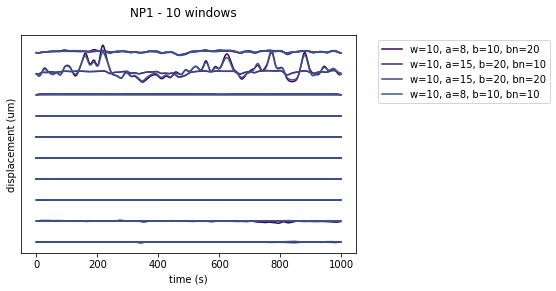

In [5]:
plot('/media/peter/2TB/hyundong/NP1/drift_np1.yaml', 10, 40)

/media/peter/2TB/john/anaconda3/envs/yass/lib/python3.7/site-packages/yass/config/config.py:133: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  mapping = yaml.load(file)
/media/peter/2TB/john/anaconda3/envs/yass/lib/python3.7/site-packages/yass/config/validate.py:63: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  schema = yaml.load(file)


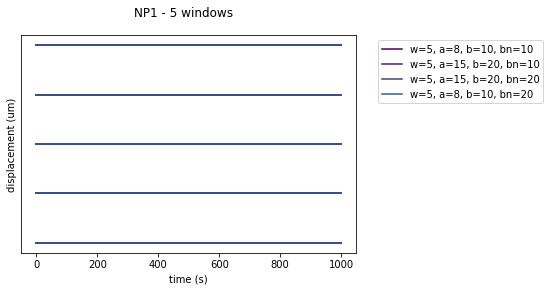

In [7]:
plot('/media/peter/2TB/hyundong/NP1/drift_np1.yaml', 5, 500)

/media/peter/2TB/john/anaconda3/envs/yass/lib/python3.7/site-packages/yass/config/config.py:133: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  mapping = yaml.load(file)
/media/peter/2TB/john/anaconda3/envs/yass/lib/python3.7/site-packages/yass/config/validate.py:63: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  schema = yaml.load(file)


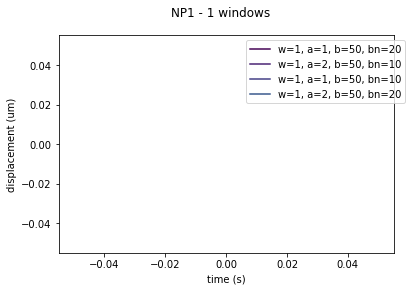

In [11]:
plot('/media/peter/2TB/hyundong/NP1/drift_np1.yaml', 1, None)

/media/peter/2TB/john/anaconda3/envs/yass/lib/python3.7/site-packages/yass/config/config.py:133: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  mapping = yaml.load(file)
/media/peter/2TB/john/anaconda3/envs/yass/lib/python3.7/site-packages/yass/config/validate.py:63: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  schema = yaml.load(file)


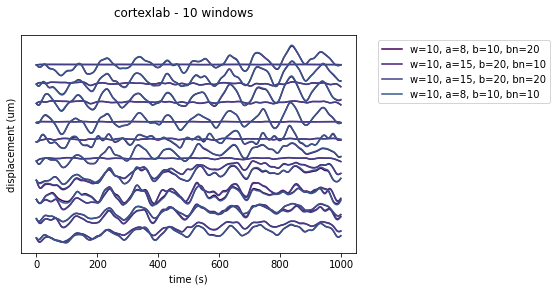

In [78]:
plot('/media/peter/2TB/hyundong/cortexlab/drift.yaml', 10, 10)

/media/peter/2TB/john/anaconda3/envs/yass/lib/python3.7/site-packages/yass/config/config.py:133: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  mapping = yaml.load(file)
/media/peter/2TB/john/anaconda3/envs/yass/lib/python3.7/site-packages/yass/config/validate.py:63: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  schema = yaml.load(file)


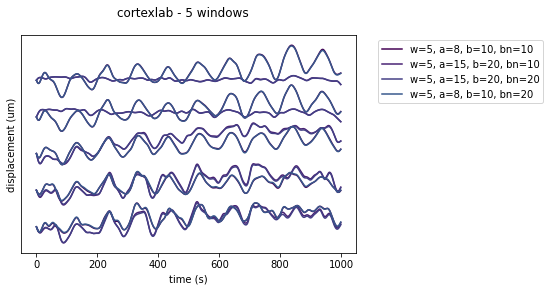

In [79]:
plot('/media/peter/2TB/hyundong/cortexlab/drift.yaml', 5, 15)

/media/peter/2TB/john/anaconda3/envs/yass/lib/python3.7/site-packages/yass/config/config.py:133: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  mapping = yaml.load(file)
/media/peter/2TB/john/anaconda3/envs/yass/lib/python3.7/site-packages/yass/config/validate.py:63: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  schema = yaml.load(file)


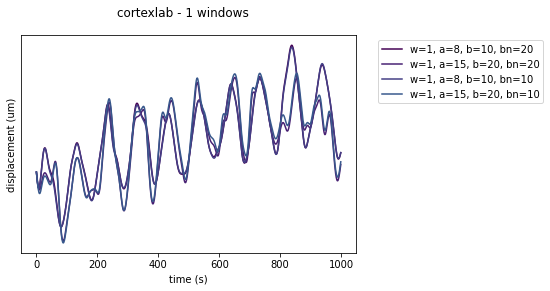

In [80]:
plot('/media/peter/2TB/hyundong/cortexlab/drift.yaml', 1, None)

/media/peter/2TB/john/anaconda3/envs/yass/lib/python3.7/site-packages/yass/config/config.py:133: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  mapping = yaml.load(file)
/media/peter/2TB/john/anaconda3/envs/yass/lib/python3.7/site-packages/yass/config/validate.py:63: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  schema = yaml.load(file)


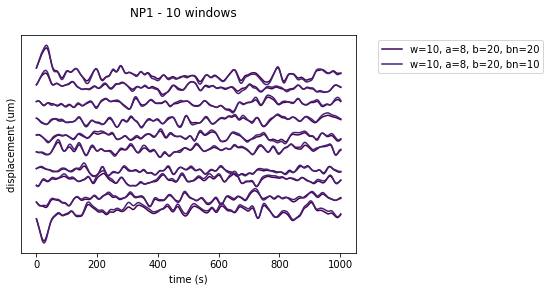

In [8]:
plot('/media/peter/2TB/hyundong/NP1/drift_np1.yaml', 10, 40)

/media/peter/2TB/john/anaconda3/envs/yass/lib/python3.7/site-packages/yass/config/config.py:133: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  mapping = yaml.load(file)
/media/peter/2TB/john/anaconda3/envs/yass/lib/python3.7/site-packages/yass/config/validate.py:63: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  schema = yaml.load(file)


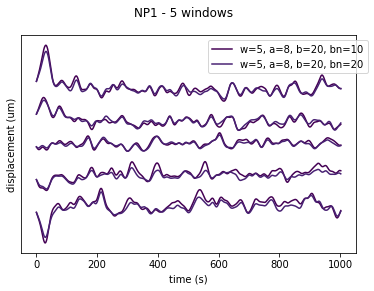

In [9]:
plot('/media/peter/2TB/hyundong/NP1/drift_np1.yaml', 5, 70)

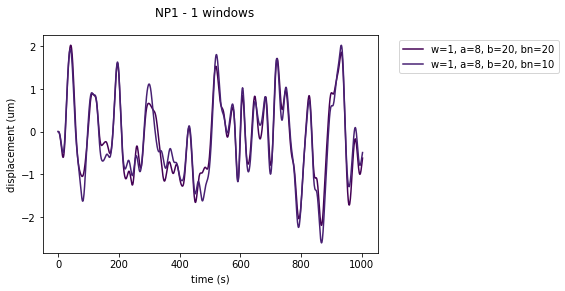

In [11]:
plot('/media/peter/2TB/hyundong/NP1/drift_np1.yaml', 1, None)

/media/peter/2TB/john/anaconda3/envs/yass/lib/python3.7/site-packages/yass/config/config.py:133: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  mapping = yaml.load(file)
/media/peter/2TB/john/anaconda3/envs/yass/lib/python3.7/site-packages/yass/config/validate.py:63: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  schema = yaml.load(file)


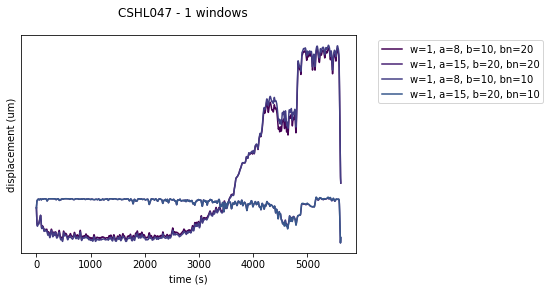

In [84]:
plot('/media/peter/2TB/hyundong/CSHL047/drift.yaml', 1, None)